In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install pypots --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 3.5 MB/s eta 0:00:00


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pypots.imputation import SAITS, BRITS
from pypots.utils.metrics import cal_mae, cal_mre, cal_mse


### Visualización de ejemplo de imputación entre SAITS y BRITS.

#### 30MCAR

In [3]:
data30 = np.load('/content/drive/MyDrive/ColabNotebooks/TFM/generated_data_saits/mcar30/train.npy')
X_test_30 = np.load('/content/drive/MyDrive/ColabNotebooks/TFM/generated_data_saits/mcar30/test_x_hat.npy')
X_test_intact_30 = np.load('/content/drive/MyDrive/ColabNotebooks/TFM/generated_data_saits/mcar30/test_x.npy')
X_indicating_mask_30 = np.load('/content/drive/MyDrive/ColabNotebooks/TFM/generated_data_saits/mcar30/test_indicating_mask.npy')

In [7]:
X = data30
num_samples = data30.shape[0]
dataset_30 = {"X": X}
x_test = {'X':X_test_30}

In [8]:
saits = SAITS(n_steps=100, n_features=37, n_layers=2, d_model=256, d_inner=128, n_heads=4, d_k=64, d_v=64, dropout=0.1, epochs=10)

saits.fit(dataset_30)
imputation_saits_30 = saits.impute(x_test)

2023-09-05 09:39:21 [INFO]: No given device, using default device: cuda
2023-09-05 09:39:21 [WARNING]: saving_path not given. Model files and tensorboard file will not be saved.
2023-09-05 09:39:21 [INFO]: Model initialized successfully with the number of trainable parameters: 1,380,282
2023-09-05 09:39:32 [INFO]: epoch 0: training loss 0.6739
2023-09-05 09:39:41 [INFO]: epoch 1: training loss 0.4547
2023-09-05 09:39:50 [INFO]: epoch 2: training loss 0.4162
2023-09-05 09:40:00 [INFO]: epoch 3: training loss 0.3949
2023-09-05 09:40:10 [INFO]: epoch 4: training loss 0.3791
2023-09-05 09:40:19 [INFO]: epoch 5: training loss 0.3672
2023-09-05 09:40:29 [INFO]: epoch 6: training loss 0.3592
2023-09-05 09:40:39 [INFO]: epoch 7: training loss 0.3513
2023-09-05 09:40:48 [INFO]: epoch 8: training loss 0.3446
2023-09-05 09:40:57 [INFO]: epoch 9: training loss 0.3382
2023-09-05 09:40:57 [INFO]: Finished training.


In [9]:
brits = BRITS(n_steps = 100, n_features = 37, rnn_hidden_size=64, epochs=10)

brits.fit(dataset_30)
imputation_brits_30 = brits.impute(x_test)

2023-09-05 09:40:58 [INFO]: No given device, using default device: cuda
2023-09-05 09:40:58 [WARNING]: saving_path not given. Model files and tensorboard file will not be saved.
2023-09-05 09:40:58 [INFO]: Model initialized successfully with the number of trainable parameters: 92,528
2023-09-05 09:43:50 [INFO]: epoch 0: training loss 0.9470
2023-09-05 09:46:02 [INFO]: epoch 1: training loss 0.6570
2023-09-05 09:48:12 [INFO]: epoch 2: training loss 0.5875
2023-09-05 09:50:24 [INFO]: epoch 3: training loss 0.5686
2023-09-05 09:52:35 [INFO]: epoch 4: training loss 0.5611
2023-09-05 09:54:44 [INFO]: epoch 5: training loss 0.5571
2023-09-05 09:56:51 [INFO]: epoch 6: training loss 0.5546
2023-09-05 09:58:59 [INFO]: epoch 7: training loss 0.5529
2023-09-05 10:01:06 [INFO]: epoch 8: training loss 0.5515
2023-09-05 10:03:14 [INFO]: epoch 9: training loss 0.5505
2023-09-05 10:03:14 [INFO]: Finished training.


In [11]:
imputation_brits_30.shape

(2000, 100, 37)

In [63]:
dict = {'target':list(X_test_30[1500][:50,1]),
        'real': list(X_test_intact_30[1500][:50,1]),
        'predicted_saits' : list(imputation_saits_30[1500][:50,1]),
        'predicted_brits' : list(imputation_brits_30[1500][:50,1])
        }

In [64]:
df = pd.DataFrame(dict)

<ipython-input-92-6dbd533f65c2>:9: UserWarning: Legend does not support handles for Axes instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.figlegend(handles= [g,j,k,h])


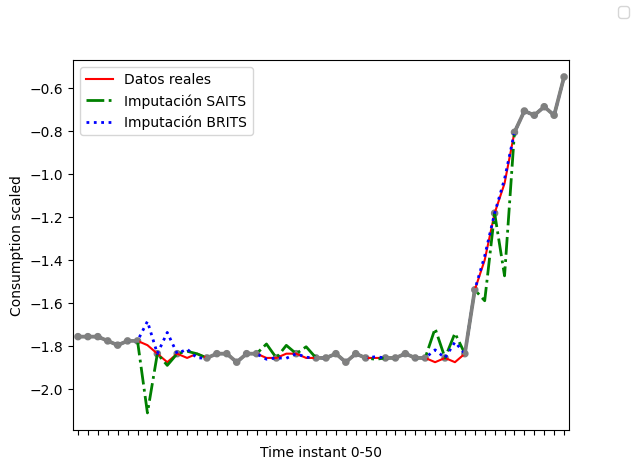

In [92]:
g = sns.lineplot(data = df, x = df.index, y = df['real'],linestyle='-', color = 'red', label = 'Datos reales')
j = sns.lineplot(data = df, x = df.index, y = df['predicted_saits'],linestyle='-.', color = 'green', linewidth = 2, label='Imputación SAITS')
k = sns.lineplot(data = df, x = df.index, y = df['predicted_brits'],linestyle=':', color = 'blue', linewidth = 2, label ='Imputación BRITS')
h = sns.pointplot(data = df, x = df.index, y =df['target'], markers='.', color='grey', label = 'Datos de entrada')


h.set(xticklabels=[],xlabel = 'Time instant 0-50', ylabel = 'Consumption scaled')

plt.figlegend(handles= [g,j,k,h])
'''
plt.legend ({'Datos reales': g ,
             'Datos de entrada': j,
             'Imputación BRITS': k ,
             'Imputación SAITS': h })
'''
plt.show()